In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("/content/csv_chronic_kidney_disease_full.csv",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 71: expected 26 fields, saw 27\nSkipping line 74: expected 26 fields, saw 27\nSkipping line 371: expected 26 fields, saw 27\n'


# Data Imputation:


In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df.isna().sum()

id           0
'age'        9
'bp'        12
'sg'        47
'al'        46
'su'        49
'rbc'      150
'pc'        65
'pcc'        4
'ba'         4
'bgr'       43
'bu'        19
'sc'        17
'sod'       85
'pot'       86
'hemo'      52
'pcv'       70
'wbcc'     105
'rbcc'     130
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
'class'      0
dtype: int64

In [ ]:
df["'age'"] = df["'age'"].replace(np.NaN, df["'age'"].median())
df["'bgr'"] = df["'bgr'"].replace(np.NaN, df["'bgr'"].median())
df["'bu'"] = df["'bu'"].replace(np.NaN, df["'bu'"].median())
df["'sc'"] = df["'sc'"].replace(np.NaN, df["'sc'"].median())
df["'sod'"] = df["'sod'"].replace(np.NaN, df["'sod'"].median())
df["'pot'"] = df["'pot'"].replace(np.NaN, df["'pot'"].median())
df["'hemo'"]= df["'hemo'"].replace(np.NaN, df["'hemo'"].median())
df["'pcv'"]= df["'pcv'"].replace(np.NaN,df["'pcv'"].median())
df["'wbcc'"]= df["'wbcc'"].replace(np.NaN, df["'wbcc'"].median())
df["'rbcc'"] = df["'rbcc'"].replace(np.NaN, df["'rbcc'"].median())
df["'bp'"] = df["'bp'"].replace(np.NaN, df["'bp'"].median())
df["'sg'"] = df["'sg'"].replace(np.NaN, df["'sg'"].median())
df["'al'"] = df["'al'"].replace(np.NaN, df["'al'"].median())
df["'su'"] = df["'su'"].replace(np.NaN, df["'su'"].median())

In [ ]:

df["'rbc'"] = df["'rbc'"].replace(np.NaN, df["'rbc'"].mode()[0])
df["'pc'"]= df["'pc'"].replace(np.NaN, df["'pc'"].mode()[0])
df["'pcc'"]= df["'pcc'"].replace(np.NaN, df["'pcc'"].mode()[0])
df["'ba'"] = df["'ba'"].replace(np.NaN, df["'ba'"].mode()[0])
df["'htn'"] = df["'htn'"].replace(np.NaN, df["'htn'"].mode()[0])
df["'dm'"] = df["'dm'"].replace(np.NaN, df["'dm'"].mode()[0])
df["'cad'"] = df["'cad'"].replace(np.NaN, df["'cad'"].mode()[0])
df["'appet'"] = df["'appet'"].replace(np.NaN, df["'appet'"].mode()[0])
df["'pe'"] = df["'pe'"].replace(np.NaN, df["'pe'"].mode()[0])
df["'ane'"] = df["'ane'"].replace(np.NaN, df["'ane'"].mode()[0])
df["'class'"] = df["'class'"].replace(np.NaN, df["'class'"].mode()[0])


In [ ]:
df[["'rbcc'","'bp'","'sg'","'al'","'bgr'","'bu'","'sc'","'sod'","'pot'","'su'","'hemo'"]] = df[["'rbcc'","'bp'","'sg'","'al'","'bgr'","'bu'","'sc'","'sod'","'pot'","'su'","'hemo'"]].astype('float64')
df[["'pcv'", "'wbcc'", "'age'"]] = df[["'pcv'", "'wbcc'", "'age'"]].astype('int64')
df.dtypes

id           int64
'age'        int64
'bp'       float64
'sg'       float64
'al'       float64
'su'       float64
'rbc'       object
'pc'        object
'pcc'       object
'ba'        object
'bgr'      float64
'bu'       float64
'sc'       float64
'sod'      float64
'pot'      float64
'hemo'     float64
'pcv'        int64
'wbcc'       int64
'rbcc'     float64
'htn'       object
'dm'        object
'cad'       object
'appet'     object
'pe'        object
'ane'       object
'class'     object
dtype: object

# encoding


In [ ]:
col = ["'pcc'","'rbc'", "'pc'", "'ba'", "'htn'", "'dm'", "'cad'", "'pe'", "'ane'"]
encoder = LabelEncoder()
for col in col:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df[["'appet'", "'class'"]] = df[["'appet'", "'class'"]].replace(to_replace={'good':'1', 'ckd':'1', 'notckd':'0', 'poor':'0'})

# Feature Selection:

**RFECV method:**

In [ ]:
X = df.drop("'class'", axis=1)
y = df["'class'"]

In [ ]:
ols = LinearRegression()
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error", cv=4, verbose=0, n_jobs=4)
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("Num Features Before:", X.shape[1])
print("Num Features After:", X_new.shape[1])


Num Features Before: 25
Num Features After: 20


In [ ]:
rfecv.n_features_

20

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


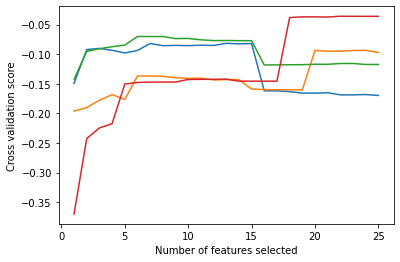

In [ ]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.show()

In [ ]:
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.shape

(397, 20)

In [ ]:
X_new_df.shape

(397, 20)

# Checking unbalaced data 

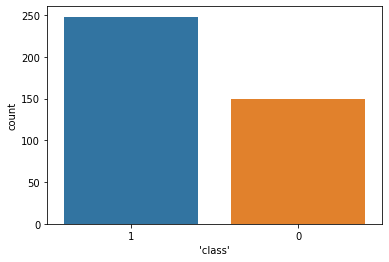

In [ ]:

sns.countplot(x = "'class'", data = df)


1.   1=>Ckd
2.   0=> Notckd

> 
=>our data is unbalanced





# Normalizing data 

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(X_new_df)
features

array([[-1.73326832,  0.2537764 ,  0.41742111, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [-1.72458996, -1.96863308,  0.41742111, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [-1.7159116 ,  0.2537764 , -1.4238698 , ..., -1.95996516,
        -0.48261709,  2.36995077],
       ...,
       [ 1.7120424 ,  0.2537764 ,  0.41742111, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [ 1.72072077, -1.22782992,  1.33806657, ...,  0.51021315,
        -0.48261709, -0.42194969],
       [ 1.72939913,  0.2537764 ,  1.33806657, ...,  0.51021315,
        -0.48261709, -0.42194969]])

# Splitting data 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25) 

# **Modeling**

# SVM
(farah)

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
# Fit the model
svc.fit(X_train, y_train)
# Measure the performance
y_predictsvm = svc.predict(X_test)
print("Accuracy score %.3f" %accuracy_score(y_test, y_predictsvm))

Accuracy score 1.000


In [ ]:
print(classification_report(y_predictsvm, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# KNN
(balkis)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of K-NN classifier on training set: 1.00


In [ ]:

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Random Forest Classifier
(farah)

In [ ]:
rclf=RandomForestClassifier(n_estimators=100)
rclf.fit(X_train,y_train)

y_predrclf=rclf.predict(X_test)
ac=accuracy_score(y_test, y_predrclf)
ac
#print(classification_report(y_test, y_predrclf))

1.0

# Decsion Tree Classifier 
(balkis)


In [ ]:
dclf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dclf = dclf.fit(X_train,y_train)

#Predict the response for test dataset
y_preddclf = dclf.predict(X_test)
print(classification_report(y_test, y_preddclf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        57

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
from sklearn.metrics import recall_score
lst=['SVM','KNN','DecisionTree','RandomForest']
accuracy=[accuracy_score(y_test, y_predictsvm),knn.score(X_train, y_train),accuracy_score(y_test, y_predrclf),accuracy_score(y_test, y_preddclf)]
dfres = pd.DataFrame(accuracy,columns=['accuracy'],index=lst)
dfres


,accuracy
SVM,1.000000
KNN,0.996633
DecisionTree,1.000000
RandomForest,0.990000
